# BASICS 01 - Spatiotemporal Surfaces

In [8]:
%load_ext autoreload
%autoreload 2
%cd '../HOTS'
%matplotlib inline

/Users/joe/Documents/boulot/git/homhots/brandnewhots/HOTS/HOTS


In [9]:
import numpy as np

from TimeSurface import timesurface
from Network_barrel import LoadFromMat

datapath = "../Data/alphabet_ExtractedStabilized.mat"

# Loading the events

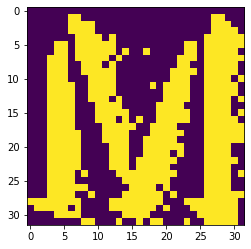

In [3]:
import matplotlib.pyplot as plt
sensor_size = [32,32]
stop_indice = 20000

add, t, p, polz = LoadFromMat(datapath,image_number=15)
t_scaled = np.array(t*1e6, dtype='int')

pixgridON = np.zeros([sensor_size[0], sensor_size[1]])
pixgridOFF = np.zeros([sensor_size[0], sensor_size[1]])
for i in range(stop_indice):
    if p[i]==1:
        pixgridON[add[i,0],add[i,1]]=1
    else: 
        pixgridOFF[add[i,0],add[i,1]]=1
plt.imshow(pixgridON);

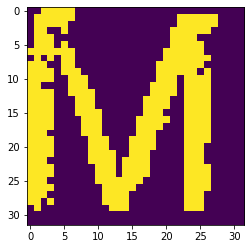

In [4]:
plt.imshow(pixgridOFF);

# Creating the SpatioTemporal Surface

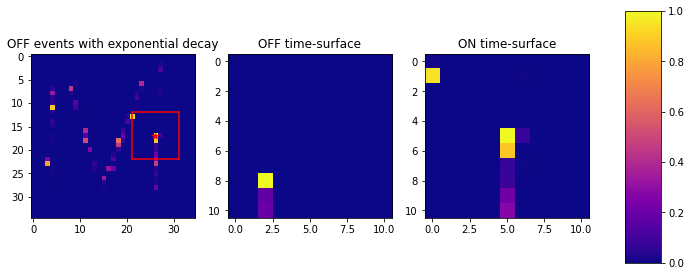

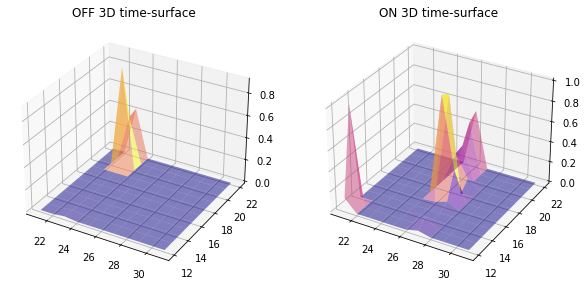

In [12]:
target_event = 20000
R, tau, camsize, nbpol, sigma, decay = 5, 2e2, [34,34], 2, 1, 'exponential'
SpTe = timesurface(R, tau, camsize, nbpol, sigma, decay)
i = 0
while i<target_event+1:
    P = np.zeros([nbpol])
    x, y, t, P[p[i]] = add[i,1],add[i,0],t_scaled[i], 1
    TS = SpTe.addevent(x, y, t, P)
    i+=1
    
SpTe.plote()

SpTe.plot3D()

## Testing a bigger $\tau$

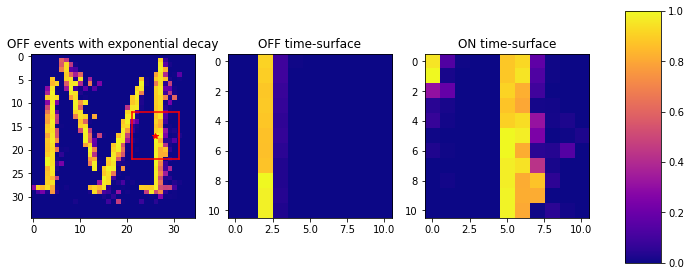

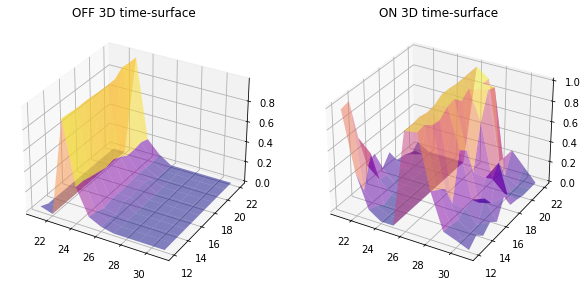

In [14]:
target_event = 20000

tau = 2e4
SpTe2 = timesurface(R, tau, camsize, nbpol, sigma, decay)
i = 0
while i<target_event+1:
    P = np.zeros([nbpol])
    x, y, t, P[p[i]] = add[i,1],add[i,0],t_scaled[i], 1
    TS = SpTe2.addevent(x, y, t, P)
    i+=1
    
SpTe2.plote()

SpTe2.plot3D()

# With tonic

In [4]:
import tonic
import torch
learningset = tonic.datasets.POKERDVS(save_to='../Data/',
                                train=False,
                                transform=None)

Using downloaded and verified file: ../Data/pips_test.tar.gz
Extracting ../Data/pips_test.tar.gz to ../Data/


In [5]:
loader = torch.utils.data.DataLoader(learningset, shuffle=True)

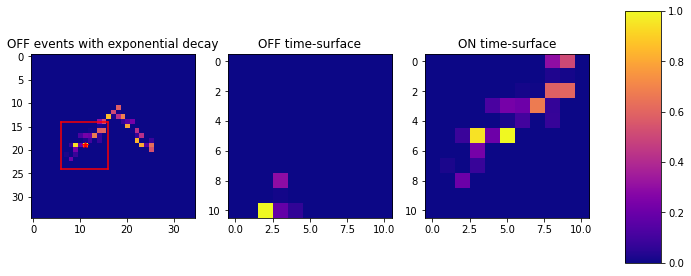

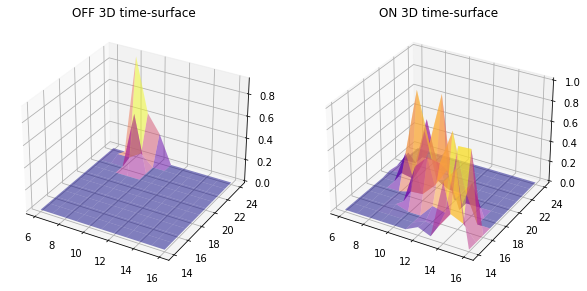

In [18]:
target_event = 2000
R, tau, camsize, nbpol, sigma, decay = 5, 2e2, [34,34], 2, 1, 'exponential'
SpTetonic = timesurface(R, tau, camsize, nbpol, sigma, decay)
events, target = next(iter(loader))
iev = 0
while iev<target_event:
    p = np.zeros([nbpol])
    x,y,t,p[int(events[0][iev][learningset.ordering.find("p")].item())] =   \
                int(events[0][iev][learningset.ordering.find("x")].item()), \
                int(events[0][iev][learningset.ordering.find("y")].item()), \
                int(events[0][iev][learningset.ordering.find("t")].item()), \
                1
    TS = SpTetonic.addevent(x,y,t,p)
    iev+=1
    
SpTetonic.plote()

SpTetonic.plot3D()

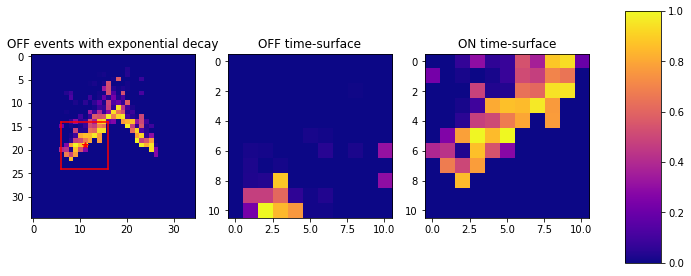

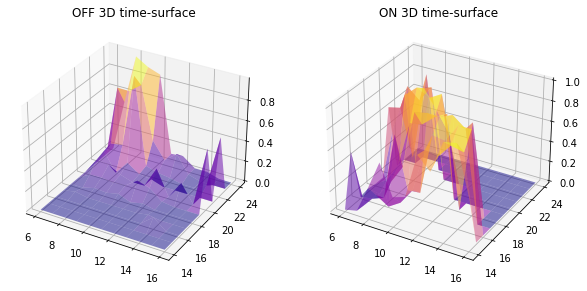

In [19]:
tau = 2e3
SpTetonic = timesurface(R, tau, camsize, nbpol, sigma, decay)
iev = 0
while iev<target_event:
    p = np.zeros([nbpol])
    x,y,t,p[int(events[0][iev][learningset.ordering.find("p")].item())] =   \
                int(events[0][iev][learningset.ordering.find("x")].item()), \
                int(events[0][iev][learningset.ordering.find("y")].item()), \
                int(events[0][iev][learningset.ordering.find("t")].item()), \
                1
    TS = SpTetonic.addevent(x,y,t,p)
    iev+=1
    
SpTetonic.plote()

SpTetonic.plot3D()

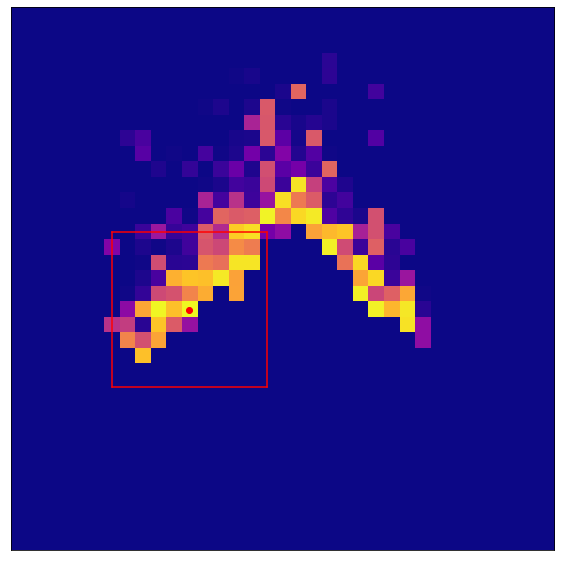

In [21]:
import matplotlib.pyplot as plt
gamma = 2
#SpTetonic.spatpmat[SpTetonic.spatpmat==0] = np.nan
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow((SpTetonic.spatpmat[SpTetonic.p].T)**gamma, cmap=plt.cm.plasma)
ax.plot(SpTetonic.x,SpTetonic.y,'r o')
ax.plot([SpTetonic.x-SpTetonic.R, SpTetonic.x-SpTetonic.R], [SpTetonic.y-SpTetonic.R, SpTetonic.y+SpTetonic.R], color='red')
ax.plot([SpTetonic.x-SpTetonic.R, SpTetonic.x+SpTetonic.R], [SpTetonic.y-SpTetonic.R, SpTetonic.y-SpTetonic.R], color='red')
ax.plot([SpTetonic.x-SpTetonic.R, SpTetonic.x+SpTetonic.R], [SpTetonic.y+SpTetonic.R, SpTetonic.y+SpTetonic.R], color='red')
ax.plot([SpTetonic.x+SpTetonic.R, SpTetonic.x+SpTetonic.R], [SpTetonic.y-SpTetonic.R, SpTetonic.y+SpTetonic.R], color='red')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

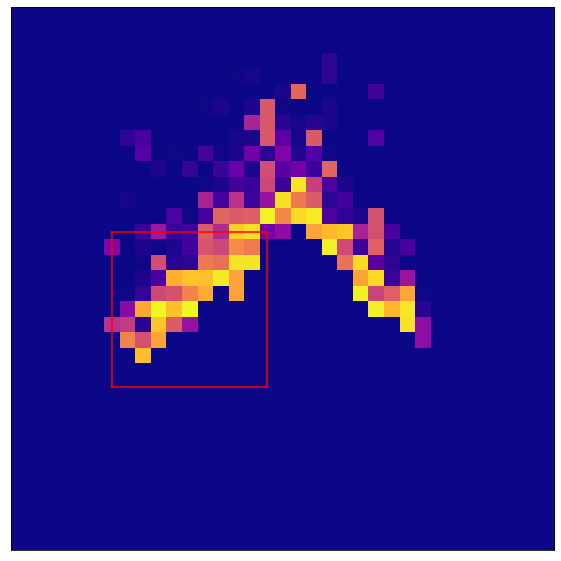

In [22]:
gamma = 2
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow((SpTetonic.spatpmat[1].T)**gamma, cmap=plt.cm.plasma)
#ax.plot(SpTetonic.x,SpTetonic.y,'r s')
ax.plot([SpTetonic.x-SpTetonic.R, SpTetonic.x-SpTetonic.R], [SpTetonic.y-SpTetonic.R, SpTetonic.y+SpTetonic.R], color='red')
ax.plot([SpTetonic.x-SpTetonic.R, SpTetonic.x+SpTetonic.R], [SpTetonic.y-SpTetonic.R, SpTetonic.y-SpTetonic.R], color='red')
ax.plot([SpTetonic.x-SpTetonic.R, SpTetonic.x+SpTetonic.R], [SpTetonic.y+SpTetonic.R, SpTetonic.y+SpTetonic.R], color='red')
ax.plot([SpTetonic.x+SpTetonic.R, SpTetonic.x+SpTetonic.R], [SpTetonic.y-SpTetonic.R, SpTetonic.y+SpTetonic.R], color='red')
ax.set_xticks(())
ax.set_yticks(())
plt.show()